# COVID-19 spread analysis
using Kermack McKendrick SIR Epidemic model

(with some modifications).

by:

Achyut Dave

Machine Learning for Engineers

Department of Electrical and Computer Engineering

May 06, 2020.

In [2]:
import numpy as np
from toolz import unique
import matplotlib.pyplot as plt
import math
import random

How does the disease spread?


Does lockdown have any effect?


Can testing help?

How does the disease spread?


Q. How does any communicable disease spread?

A. Through contact (vicinity of 6 feets).

In [4]:
def data_pre_lockdown(verbose = True, up_limit = 90, low_limit = 12, sample_plot= False, final_plot = True, final_data = True):
    data_p_6 = np.genfromtxt(r'C:\Windows\System32\Class\Spring 2020\ECEN 5002 - Machine Learning for Engineers\Project\project_data\co-presence\tij_pres_LyonSchool.dat')
    #data_c_5 = int(data_c_5)
    if verbose:
        print(data_p_6)
        print(type(data_p_6))

        print(data_p_6[:,1])

    X_range = sorted(unique(data_p_6[:,1]))
    Y_range = sorted(unique(data_p_6[:,2]))

    height = len(X_range)
    width = len(Y_range)

    print(height)
    print(width)

    #print(X_range)
    #print(Y_range)

    A_p_6 = np.zeros([height, width])
    size = np.zeros([height, width])

    total_len = len(data_p_6)

    #print(data_c_3[0])
    #print(A_p_6[0,0])
    
    divisor=data_p_6[:,0] / max(data_p_6[:,0])
    divisor = divisor * up_limit
    new_data=[]
    
    #print(list(divisor.reshape(1,len(divisor))[0]))
    
    for i in range(len(divisor)):
        if divisor[i] <low_limit:
            new_data.append(low_limit)
        else:
            new_data.append(divisor[i])
    #print(min(new_data))
    
    for l in range(total_len):
        i = X_range.index(data_p_6[l][1])
        j = Y_range.index(data_p_6[l][2])
        A_p_6[i,j] = new_data[l]
        size[i,j] = 10

    if verbose:
        print('percentage of contacts: ')
        print(len(A_p_6[np.nonzero(A_p_6)]) * 100/ (height * width))
        print('percentage of people going out: ')
        print(math.sqrt(len(A_p_6[np.nonzero(A_p_6)])/ (height * width)) * 100)
        #print(A_p_6)
    
    np.random.shuffle(A_p_6)
    if sample_plot:
        plt.imshow(A_p_6, cmap='Greys', interpolation = 'nearest')
        plt.show()
    
    #B=np.zeros([2,2])
    B_p_6=A_p_6
    C_p_6=np.array([B_p_6,B_p_6,B_p_6])
    C_p_6=C_p_6.reshape(360, 482)
    #print(C_p_6)
    
    np.random.shuffle(C_p_6)
    if final_plot:
        plt.imshow(C_p_6, cmap='Greys', interpolation = 'nearest')
        plt.show()
    
    #print(list(C_p_6.reshape(1,360 * 482)[0]))
    
    #print([C_p_6 == 0])
    # Assign the median to the zero elements 
    C_p_6[C_p_6 == 0] = low_limit
    if final_data:
        print(C_p_6)
        
    #print(list(C_p_6.reshape(1,360 * 482)[0]))
    return list(C_p_6.reshape(1,360 * 482)[0])

Q. How do we study contact among people?

A. We try to study contacts through Contact Networks, which are similar to Social Media networks.

[[ 34240.   1711.   1757.]
 [ 34240.   1711.   1759.]
 [ 34240.   1711.   1766.]
 ...
 [151960.   1560.   1580.]
 [151960.   1560.   1712.]
 [151960.   1580.   1712.]]
<class 'numpy.ndarray'>
[1711. 1711. 1711. ... 1560. 1560. 1580.]
240
241
percentage of contacts: 
45.97856154910097
percentage of people going out: 
67.80749335368546


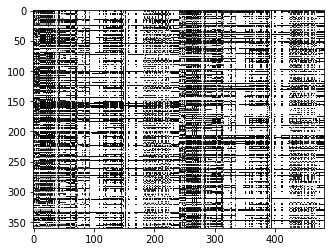

[[83.31929455 72.63490392 83.31929455 ... 12.         12.
  12.        ]
 [12.         12.         12.         ... 12.         12.
  12.        ]
 [83.35483022 89.53803633 83.35483022 ... 76.08186365 81.09239273
  86.02000526]
 ...
 [76.899184   76.899184   76.899184   ... 12.         12.
  12.        ]
 [83.342985   76.899184   83.342985   ... 88.49565675 78.58120558
  88.49565675]
 [12.         23.79705186 12.         ... 12.         12.
  12.        ]]


In [5]:
C_p_6 = data_pre_lockdown()

Key thing to note:

If only 68 % of people go out, chances of contacting virus is 45 %.

In [2]:
def data_post_lockdown(verbose = True, up_limit = 45, low_limit = 6, sample_plot= False, final_plot = True, final_data = True):
    data_c_6 = np.genfromtxt(r'C:\Windows\System32\Class\Spring 2020\ECEN 5002 - Machine Learning for Engineers\Project\project_data\contact\tij_Thiers13.dat')
    #data_c_5 = int(data_c_5)
    
    if verbose:
        print(data_c_6)
        print(type(data_c_6))

        print(data_c_6[:,1])

    X_range = sorted(unique(data_c_6[:,1]))
    Y_range = sorted(unique(data_c_6[:,2]))

    height = len(X_range)
    width = len(Y_range)

    print(height)
    print(width)

    #print(X_range)
    #print(Y_range)

    A_c_6 = np.zeros([height, width])
    size = np.zeros([height, width])

    total_len = len(data_c_6)

    #print(data_c_3[0])
    #print(A_c_6[0,0])
    
    divisor=data_c_6[:,0] / max(data_c_6[:,0])
    divisor = divisor * up_limit
    new_data=[]
    for i in range(len(divisor)):
        if divisor[i] <low_limit:
            new_data.append(low_limit)
        else:
            new_data.append(divisor[i])
    #print(new_data)
    
    for l in range(total_len):
        i = X_range.index(data_c_6[l][1])
        j = Y_range.index(data_c_6[l][2])
        A_c_6[i,j] = new_data[l]
        size[i,j] = 10

    if verbose:
        print('percentage of contacts: ')
        print(len(A_c_6[np.nonzero(A_c_6)]) * 100/ (height * width))
        print('percentage of people going out: ')
        print(math.sqrt(len(A_c_6[np.nonzero(A_c_6)])/ (height * width)) * 100)
    
    np.random.shuffle(A_c_6)
    if sample_plot:
        plt.imshow(A_c_6, cmap='Greys', interpolation = 'nearest')
        plt.show()
    
    #B=np.zeros([2,2])
    B_c_6=A_c_6
    C_c_6=np.array([B_c_6,B_c_6])
    #C=C.reshape(4,4)
    C_c_6=C_c_6.reshape(320, 634)
    #print(C_c_6)
    
    np.random.shuffle(C_c_6)
    if final_plot:
        plt.imshow(C_c_6, cmap='Greys', interpolation = 'nearest')
        plt.show()
    
    # Assign the median to the zero elements 
    C_c_6[C_c_6 == 0] = low_limit
    if final_data:
        print(C_c_6)
        
    return list(C_c_6.reshape(1,320 * 634)[0])

[[4.3220e+04 4.5400e+02 6.4000e+02]
 [4.3220e+04 1.0000e+00 9.3900e+02]
 [4.3220e+04 1.8500e+02 2.5800e+02]
 ...
 [4.0678e+05 2.7200e+02 9.3900e+02]
 [4.0678e+05 3.1100e+02 4.9600e+02]
 [4.0678e+05 1.2000e+02 2.8500e+02]]
<class 'numpy.ndarray'>
[454.   1. 185. ... 272. 311. 120.]
320
317
percentage of contacts: 
5.735410094637224
percentage of people going out: 
23.94871623832314


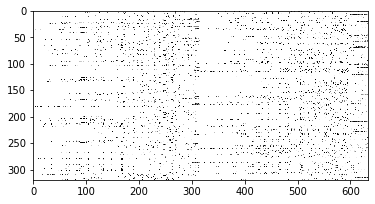

[[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]


In [3]:
C_c_6 = data_post_lockdown()

Key thing to note:

If only 24 % people go out, chances of contacting the virus is 6 %.